In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "../data/tabular/series_metadata.csv"

df = pd.read_csv(data_path)

In [3]:
df.head()

,start_index,end_index,MSE_0,MSE_1,MSE_2,MSE_3,MSE_4,MSE_5,MSE_6,MSE_7,...,AVG_SSIM,CHANNEL_0,CHANNEL_1,CHANNEL_2,CHANNEL_3,CHANNEL_4,CHANNEL_5,CHANNEL_6,CHANNEL_7,CHANNEL_8
0,0,9,0.00,0.0000,77.3700,0.0000,0.0000,69.3676,0.0,0.0000,...,0.900631,103.845184,0.0,0.0,0.000000,0.000000,63.951360,0.013435,0.0,128.348460
1,1,10,0.00,77.3700,0.0000,0.0000,69.3676,0.0000,0.0,0.0000,...,0.900631,53.441868,0.0,0.0,0.000000,0.000149,29.384336,0.445748,0.0,64.198990
2,2,11,77.37,0.0000,0.0000,69.3676,0.0000,0.0000,0.0,0.0000,...,0.900631,11.086669,0.0,0.0,0.000149,0.013732,5.759867,5.430315,0.0,35.809890
3,3,12,0.00,0.0000,69.3676,0.0000,0.0000,0.0000,0.0,0.0000,...,0.918762,0.879055,0.0,0.0,0.013435,0.472766,0.445991,24.290306,0.0,40.785810
4,4,13,0.00,69.3676,0.0000,0.0000,0.0000,0.0000,0.0,69.3676,...,0.918762,0.025855,0.0,0.0,0.445748,6.335247,0.012927,39.907257,0.0,24.083387


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359792 entries, 0 to 359791
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   start_index  359792 non-null  int64  
 1   end_index    359792 non-null  int64  
 2   MSE_0        359792 non-null  float64
 3   MSE_1        359792 non-null  float64
 4   MSE_2        359792 non-null  float64
 5   MSE_3        359792 non-null  float64
 6   MSE_4        359792 non-null  float64
 7   MSE_5        359792 non-null  float64
 8   MSE_6        359792 non-null  float64
 9   MSE_7        359792 non-null  float64
 10  MSE_8        359792 non-null  float64
 11  SSIM_0       358724 non-null  float64
 12  SSIM_1       358724 non-null  float64
 13  SSIM_2       358724 non-null  float64
 14  SSIM_3       358724 non-null  float64
 15  SSIM_4       358724 non-null  float64
 16  SSIM_5       358724 non-null  float64
 17  SSIM_6       358724 non-null  float64
 18  SSIM_7       358724 non-

There is a problem since some rows are NaN

In [13]:
df[df.isna().any(axis=1)]

,start_index,end_index,MSE_0,MSE_1,MSE_2,MSE_3,MSE_4,MSE_5,MSE_6,MSE_7,...,AVG_SSIM,CHANNEL_0,CHANNEL_1,CHANNEL_2,CHANNEL_3,CHANNEL_4,CHANNEL_5,CHANNEL_6,CHANNEL_7,CHANNEL_8
32662,32662,32671,0.0000,7.9412,0.0000,0.0000,0.0000,0.0000,0.0000,105.4560,...,NaN,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
32663,32663,32672,7.9412,0.0000,0.0000,0.0000,0.0000,0.0000,105.4560,0.0000,...,NaN,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
32664,32664,32673,0.0000,0.0000,0.0000,0.0000,0.0000,105.4560,0.0000,0.0000,...,NaN,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
32665,32665,32674,0.0000,0.0000,0.0000,0.0000,105.4560,0.0000,0.0000,0.0000,...,NaN,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
32666,32666,32675,0.0000,0.0000,0.0000,105.4560,0.0000,0.0000,0.0000,0.0000,...,NaN,0.000000,0.0,0.0,0.000297,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281262,281262,281271,0.0000,0.0000,0.0000,0.0000,0.0000,111.5092,0.0000,0.0000,...,NaN,0.000149,0.0,0.0,0.000446,0.0,0.0,0.000000,0.0,0.0
281263,281263,281272,0.0000,0.0000,0.0000,0.0000,111.5092,0.0000,0.0000,87.5372,...,NaN,0.013582,0.0,0.0,0.040450,0.0,0.0,0.000000,0.0,0.0
281264,281264,281273,0.0000,0.0000,0.0000,111.5092,0.0000,0.0000,87.5372,0.0000,...,NaN,0.459138,0.0,0.0,1.350547,0.0,0.0,0.000000,0.0,0.0
281265,281265,281274,0.0000,0.0000,111.5092,0.0000,0.0000,87.5372,0.0000,0.0000,...,NaN,5.875484,0.0,0.0,16.735043,0.0,0.0,0.000149,0.0,0.0


In [14]:
# Drop rows with missing values
df = df.dropna()

In [15]:
n_channels = 9
predicted_columns = [f"CHANNEL_{i}" for i in range(n_channels)]

In [16]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state=42, shuffle=False)

In [19]:
X_train = trainset.loc[:, ~trainset.columns.isin(predicted_columns)]
y_train = trainset[predicted_columns]

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test = testset.loc[:, ~trainset.columns.isin(predicted_columns)]
y_test = testset[predicted_columns]

In [23]:
y_pred = lr_model.predict(X_test)

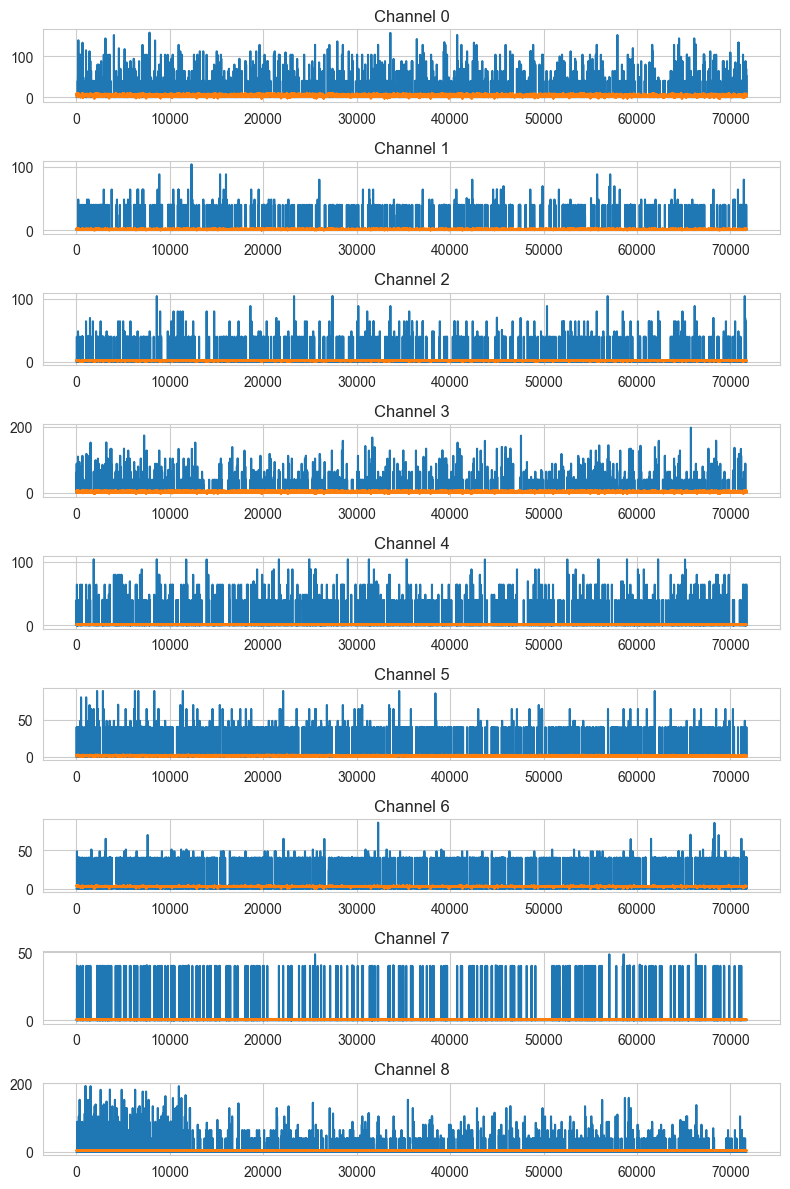

In [32]:
sns.plotting_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")

def plot_predictions(y_true, y_pred, n_channels):
    # Plot linear regression predictions for all channels
    fig, axs = plt.subplots(nrows=n_channels, figsize=(8, 12))
    for i in range(n_channels):
        axs[i].plot(y_true[:, i], label="True")
        axs[i].plot(y_pred[:, i], label="Predicted")
        axs[i].set_title(f"Channel {i}")
    plt.tight_layout()
    plt.show()

plot_predictions(y_test.values, y_pred, n_channels)

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [46]:
y_rf = rf_model.predict(X_test)
score_rf = rf_model.score(X_test, y_test)

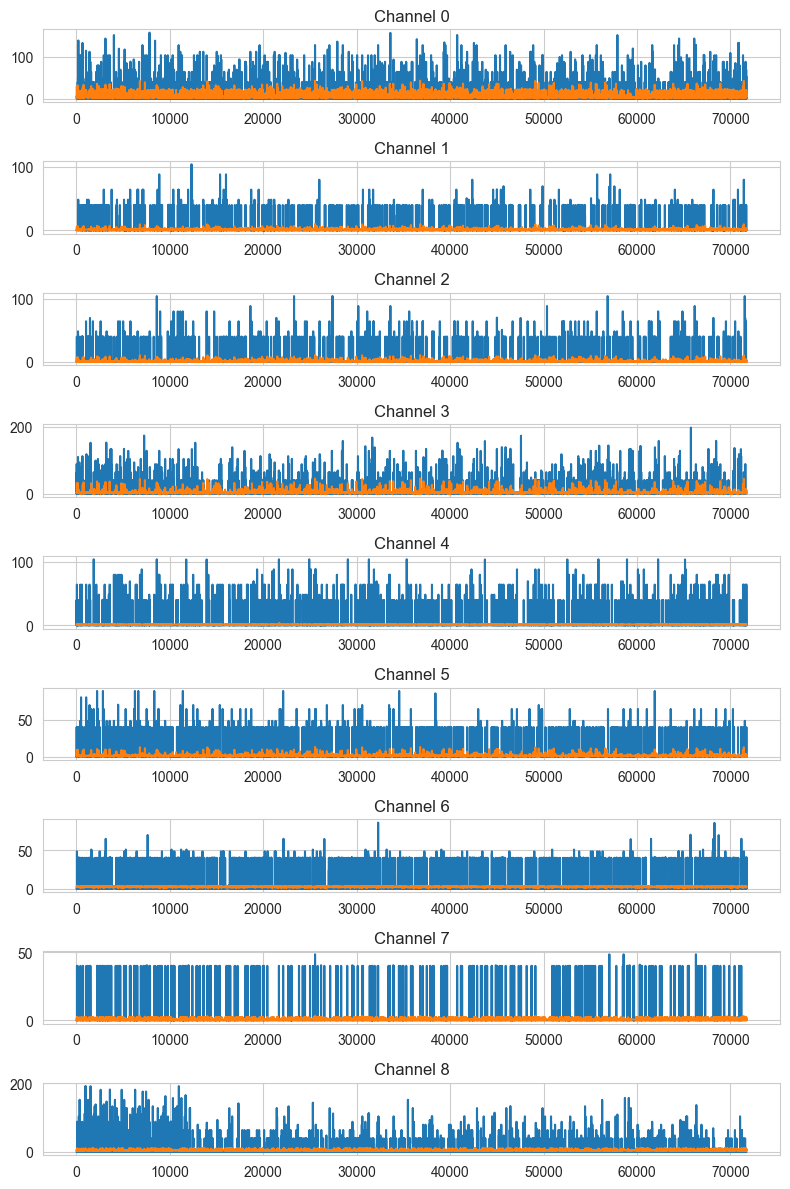

In [47]:
plot_predictions(y_test.values, y_rf, n_channels)

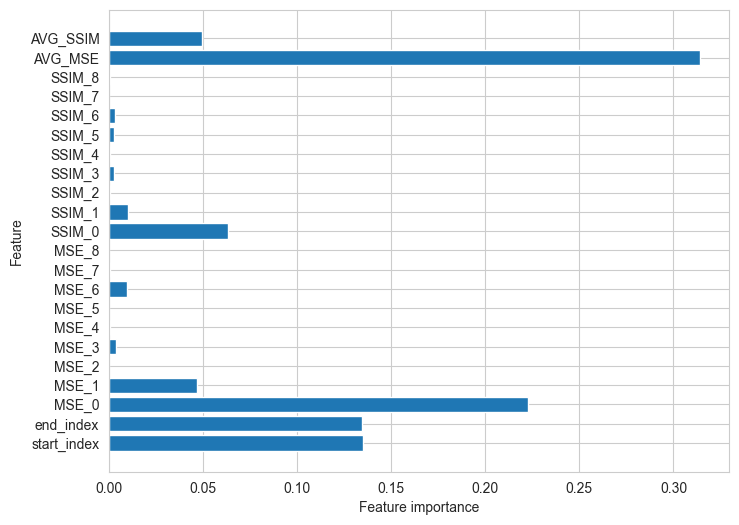

In [50]:
importance = rf_model.feature_importances_

plt.figure(figsize=(8, 6))
plt.barh(X_train.columns, importance)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

# XGBoost

In [61]:
import xgboost as xgb
params = {"objective": "reg:squarederror", "tree_method": "hist", "device" : "cuda"}

In [65]:
n = 100
xgb_reg = xgb.XGBRegressor(n_estimators=n, **params)
xgb_reg.fit(X_train, y_train)
preds = xgb_reg.predict(X_test)
model = xgb_reg.get_booster()

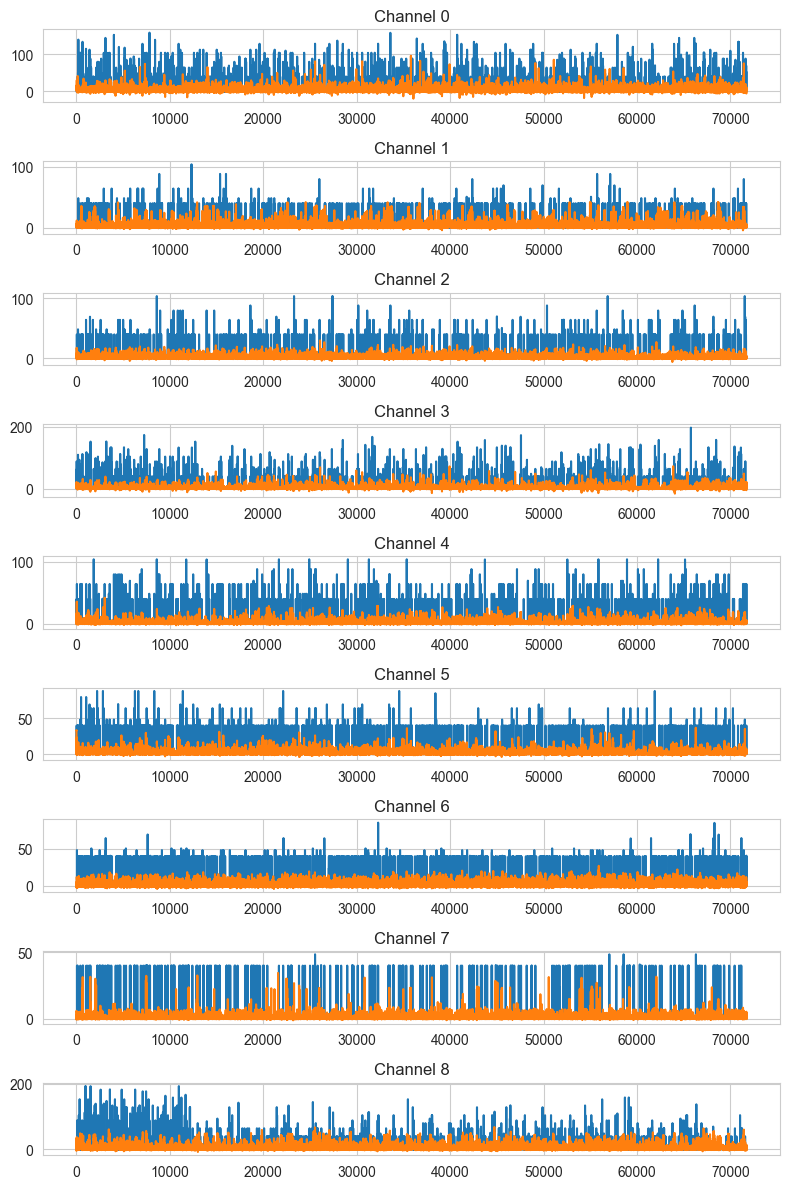

In [66]:
plot_predictions(y_test.values, preds, n_channels)

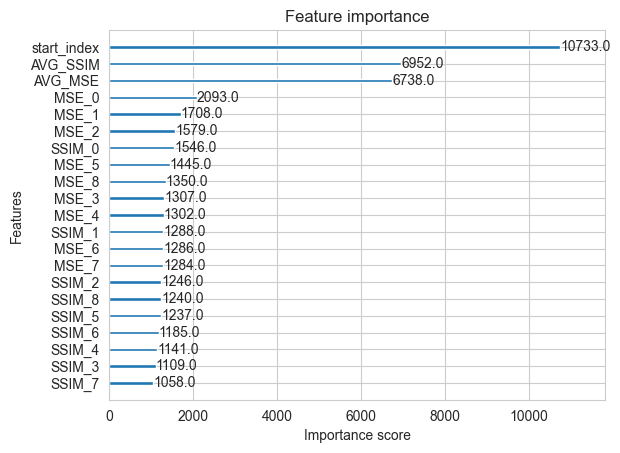

In [67]:
xgb.plot_importance(model)
plt.show()

# Symbolic Regression

In [36]:
from gplearn.genetic import SymbolicRegressor
from sympy import sympify

In [38]:
# First Test
function_set = ['add', 'sub', 'mul', 'div','cos','sin','neg','inv']
est_gp = SymbolicRegressor(population_size=5000,function_set=function_set,
                           generations=40, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0,
                           feature_names=X_train.columns)

In [39]:
converter = {
    'sub': lambda x, y : x - y,
    'div': lambda x, y : x/y,
    'mul': lambda x, y : x*y,
    'add': lambda x, y : x + y,
    'neg': lambda x    : -x,
    'pow': lambda x, y : x**y,
    'sin': lambda x    : sin(x),
    'cos': lambda x    : cos(x),
    'inv': lambda x: 1/x,
    'sqrt': lambda x: x**0.5,
    'pow3': lambda x: x**3
}

TODO: complete 

In [44]:
est_gp.fit(X_train, y_train.iloc[:, 0])
print('R2:',est_gp.score(X_test,y_test))
next_e = sympify((est_gp._program), locals=converter)
next_e

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


KeyboardInterrupt: 